### Codio Activity 15.6: Computing Gradient of Two Dimensional Function

In this activity you will explore using python to determine the gradient of a two dimensional formula.  Below, a simple 2D quadratic function is given as an analogue to the typical quadratic we have been using.  We demonstrate visualizing a 3D function using `matplotlib`.  Along the way, we will determine the gradients using the symbolic computing power of `sympy`.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

In [2]:
def f(x, y):
    return x**2 + y**2

In [3]:
x = y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

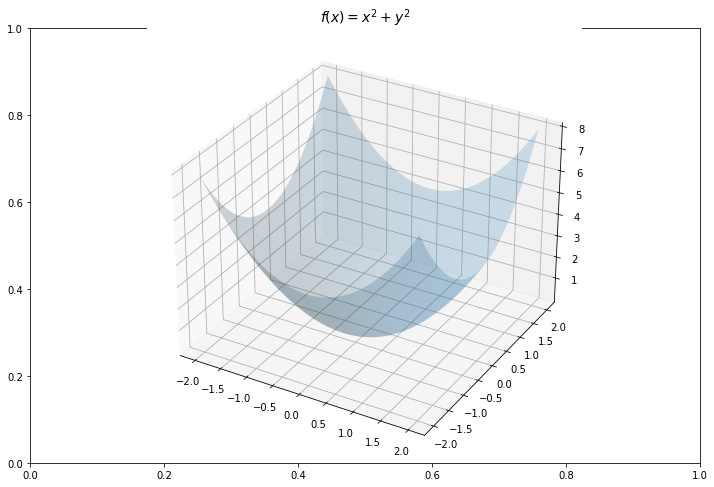

In [6]:
plt.subplots(figsize = (10, 6))
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, f(X, Y), alpha = 0.2)
plt.title(r'$f(x) = x^2 + y^2$', fontsize=14)

[Back to top](#-Index)

### Problem 1

#### Derivative with respect to $x$ and $y$

**5 Points**

Below, we turn to `sympy` the symbolic computing library to evaluate the partial derivative with respect to $x$ and $y$.  Note that a maximum or minimum value will occur where both the partial derivative with respect to $x$ and $y$ are equal to zero.  Further, the gradient is the vector formed by these partial derivatives.  

$$\nabla f = <2x, 2y>$$

What point does this suggest the minimum of $f(x, y) = x^2 + y^2$ lies?  Enter your solution as a tuple $(x, y)$ to `minimum_1`.  

In [7]:
x, y = sy.symbols('x y')

In [8]:
sy.diff(f(x, y), x)

2*x

In [9]:
sy.diff(f(x, y), y)

2*y

Text(0.5, 0.92, '$f(x) = x^2 + y^2$')

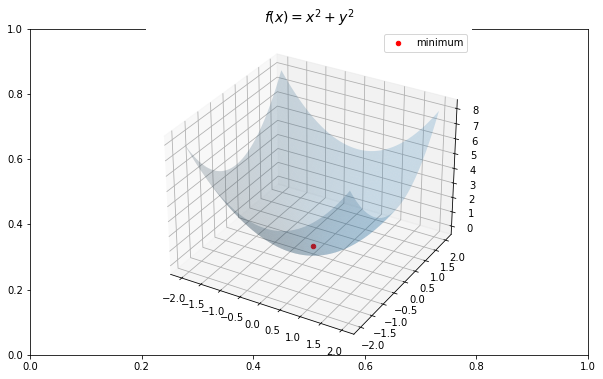

In [12]:
### GRADED
minimum_1 = ''
    
    
# YOUR CODE HERE
#raise NotImplementedError()
minimum_1 = (0,0)

### ANSWER CHECK
plt.subplots(figsize = (10, 6))
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, f(X, Y), alpha = 0.2)
ax.scatter3D(minimum_1[0], minimum_1[1], f(minimum_1[0], minimum_1[1]), s = 20, c = 'red', label = 'minimum')
plt.legend()
plt.title(r'$f(x) = x^2 + y^2$', fontsize=14)

[Back to top](#-Index)

### Problem 2

#### Example with Data

**5 Points**


Below, we load in the data from our earlier credit example and build the model

$$\hat{y} = \theta_0 X + \theta_1$$

and determine the mean squared error as

$$\frac{1}{2n} \sum_{i = 1}^n (\hat{y} - y)^2$$

Use scikitlearn to determine the values for $\theta_0$ and $\theta_1$ that minimize the `mse` function.

In [13]:
credit = pd.read_csv('data/Credit.csv', index_col=0)
X = credit['Rating'].values
y = credit['Balance'].values

In [15]:
def mse(theta0, theta1):
    yhat = theta0*X + theta1
    error = y - yhat
    squared_error = np.sum(error**2)
    return 1/(2*X.shape[0]) * squared_error

In [16]:
mse = np.vectorize(mse)

In [17]:
theta1 = np.linspace(0, 6, 100)
theta0 = np.linspace(-400, -360, 100)
T1, T0 = np.meshgrid(theta1, theta0)

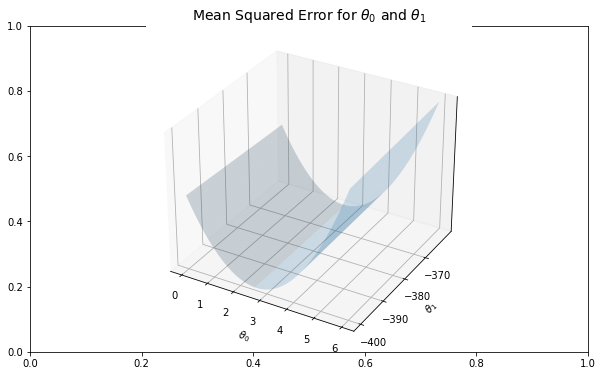

In [18]:
plt.subplots(figsize = (10, 6))
ax = plt.axes(projection = '3d')
ax.plot_surface(T1, T0, mse(T1, T0), alpha = 0.2)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title(r'Mean Squared Error for $\theta_0$ and $\theta_1$', fontsize=14)
ax.set_zticks([])
ax.set_yticks(np.arange(-400, -360, 10))

In [27]:
X, y
data = pd.DataFrame({'bias':1, "X":X})
data

,bias,X
0,1,283
1,1,483
2,1,514
3,1,681
4,1,357
...,...,...
395,1,307
396,1,296
397,1,321
398,1,192


In [33]:
X.reshape(-1,1)

array([283, 483, 514, 681, 357, 569, 259, 512, 266, 491, 589, 138, 394,
       511, 269, 200, 286, 339, 448, 479, 235, 458, 213, 398, 156, 326,
       289, 333, 949, 411, 413, 210, 563, 162, 199, 220, 455, 462, 300,
       264, 253, 538, 351, 445, 469, 564, 376, 320, 205, 354, 376, 301,
       394, 413, 138, 154, 372, 367, 281, 390, 364, 254, 160, 251, 223,
       320, 694, 380, 418, 505, 318, 538, 355, 338, 418, 224, 251, 253,
       468, 171, 288, 317, 344, 122, 232, 828, 448, 182, 352, 543, 431,
       456, 249, 388, 245, 120, 367, 266, 241, 607, 256, 190, 531, 682,
       365, 259, 115, 263, 449, 279, 250, 231, 491, 474, 268, 369, 186,
       626, 173, 137, 128, 599, 481, 117, 192, 195, 433, 259, 610, 279,
       281, 162, 407, 427, 452, 257, 314, 278, 175, 728, 459, 483, 549,
       387, 228, 341, 371, 150, 192, 121, 435, 353, 184, 344, 235, 143,
       338, 406, 406, 235, 381, 160, 515, 203, 429, 367, 214, 178, 219,
       459, 167, 299, 344, 339, 750, 206, 221, 292, 316, 560, 29

In [34]:
### GRADED
best_theta_0 = ''
best_theta_1 = ''
    
    
# YOUR CODE HERE
#raise NotImplementedError()
lr = LinearRegression(fit_intercept=False).fit(X.reshape(-1,1),y)
best_theta_0 = lr.coef_
best_theta_1 = lr.intercept_
 
### ANSWER CHECK
print(f'Equation with optimal parameters: y = {best_theta_0[0]: .2f}x + {best_theta_1: .2f}')

Equation with optimal parameters: y =  1.64x +  0.00


In [35]:
lr.coef_, lr.intercept_

(array([1.64054272]), 0.0)